In [2]:
import numpy as np
import pandas as pd
from astropy.io import ascii
import os
import matplotlib.pyplot as plt
import mpl_scatter_density
from sklearn.mixture import GaussianMixture

In [3]:
data = pd.read_csv('Catalogues/NGC2539_2.csv')
data

,RA_ICRS,DE_ICRS,Source,e_RA_ICRS,e_DE_ICRS,Plx,e_Plx,PM,pmRA,e_pmRA,...,RUWE,Gmag,BPmag,RPmag,BP-RP,RV,ELAT,RAJ2000,DEJ2000,Plx_corr
0,120.710258,-12.221209,3036167391483705344,0.1734,0.1294,0.3319,0.2797,4.819,-4.702,0.260,...,0.992,19.148891,19.625938,18.633556,0.992382,NaN,-31.901551,120.710280,-12.221205,0.351600
1,120.712788,-12.217287,3036167395781707136,0.4152,0.3122,-0.0090,0.6850,3.841,-2.492,0.572,...,1.071,20.167942,20.735071,19.416330,1.318741,NaN,-31.897151,120.712799,-12.217300,0.020332
2,120.716172,-12.215636,3036167395781793920,0.5595,0.4507,-0.5966,0.8712,0.663,-0.233,0.749,...,1.085,20.474571,21.347069,19.634233,1.712835,NaN,-31.894756,120.716174,-12.215638,-0.627124
3,120.723581,-12.202167,3036167769440850944,0.1092,0.0847,0.3858,0.1728,3.646,1.530,0.175,...,0.985,18.709621,18.981518,18.259108,0.722410,NaN,-31.879946,120.723574,-12.202153,0.409012
4,120.718800,-12.211654,3036167773738216192,0.1981,0.1428,0.3677,0.3154,1.957,1.433,0.283,...,0.976,19.274250,20.305452,18.191477,2.113976,NaN,-31.890276,120.718793,-12.211648,0.379691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324429,122.413531,-10.859482,5728389884894151936,0.2541,0.2224,0.1065,0.3861,1.986,-1.866,0.427,...,1.038,19.528597,20.100914,18.995520,1.105394,NaN,-30.175137,122.413539,-10.859486,0.120980
324430,122.425730,-10.849476,5728389919253898368,0.1619,0.1439,0.2643,0.2365,10.922,-5.841,0.247,...,1.007,19.001371,19.849955,18.213486,1.636469,NaN,-30.162484,122.425757,-10.849517,0.284890
324431,122.428312,-10.847639,5728389923548249216,0.6092,0.5401,-0.3291,0.9027,0.991,0.595,0.846,...,1.166,20.296112,21.529123,18.878445,2.650679,NaN,-30.160079,122.428310,-10.847643,-0.339350
324432,122.398694,-10.852852,5728389953613634688,0.0534,0.0487,0.1473,0.0766,2.325,-2.024,0.078,...,1.031,17.159334,17.467318,16.688830,0.778488,NaN,-30.172304,122.398703,-10.852857,0.178561


In [6]:
df1 = pd.read_csv('Catalogues/NGC2539_norm_3.csv')
df1

,RAJ2000,DEJ2000,pmRA,pmDE,BP-RP,Plx_corr
0,-1.797127,0.682875,-0.543550,-0.269104,-0.626408,-0.138054
1,-1.794661,0.686793,-0.032661,0.458025,0.026424,-0.571954
2,-1.791358,0.688461,0.489555,0.037065,0.814750,-1.420002
3,-1.784115,0.701995,0.897111,-0.681108,-1.166447,-0.062854
4,-1.788794,0.692466,0.874687,-0.319919,1.617173,-0.101260
...,...,...,...,...,...,...
324429,-0.130035,2.049500,0.112052,0.048032,-0.400345,-0.440123
324430,-0.118078,2.059505,-0.806854,1.610684,0.661992,-0.225431
324431,-0.115579,2.061386,0.680965,0.068687,2.690768,-1.043071
324432,-0.144557,2.056153,0.075527,0.133028,-1.054271,-0.364703


In [8]:
#df1 = df1.to_pandas()
df1 = df1.fillna(0).values 

In [9]:
df1 = pd.DataFrame(df1)

In [10]:
df1= df1.rename(columns={0: 'RAJ2000', 1: 'DEJ2000', 2: 'pmRA', 3 : 'pmDE', 4: 'BP-RP',
                         5: 'Plx_corr'})
df1

,RAJ2000,DEJ2000,pmRA,pmDE,BP-RP,Plx_corr
0,-1.797127,0.682875,-0.543550,-0.269104,-0.626408,-0.138054
1,-1.794661,0.686793,-0.032661,0.458025,0.026424,-0.571954
2,-1.791358,0.688461,0.489555,0.037065,0.814750,-1.420002
3,-1.784115,0.701995,0.897111,-0.681108,-1.166447,-0.062854
4,-1.788794,0.692466,0.874687,-0.319919,1.617173,-0.101260
...,...,...,...,...,...,...
324429,-0.130035,2.049500,0.112052,0.048032,-0.400345,-0.440123
324430,-0.118078,2.059505,-0.806854,1.610684,0.661992,-0.225431
324431,-0.115579,2.061386,0.680965,0.068687,2.690768,-1.043071
324432,-0.144557,2.056153,0.075527,0.133028,-1.054271,-0.364703


In [11]:
gmm = GaussianMixture(n_components = 5, tol=1e-7, max_iter=1000, random_state=60).fit(df1)

In [12]:
cluster = gmm.predict(df1)
df1['cluster'] = cluster

In [13]:
df1.cluster.value_counts()

cluster
2    139195
3     60703
4     55614
1     51988
0     16934
Name: count, dtype: int64

In [14]:
df2 = data.assign(cluster=df1["cluster"])

In [15]:
a1 = df2[df2["cluster"]==0]
a2 = df2[df2["cluster"]==1]
a3 = df2[df2["cluster"]==2]
a4 = df2[df2["cluster"]==3]
a5 = df2[df2["cluster"]==4]

/opt/anaconda3/envs/analysis-env/lib/python3.12/site-packages/matplotlib/collections.py:996: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


Text(0, 0.5, 'Gmag (mag)')

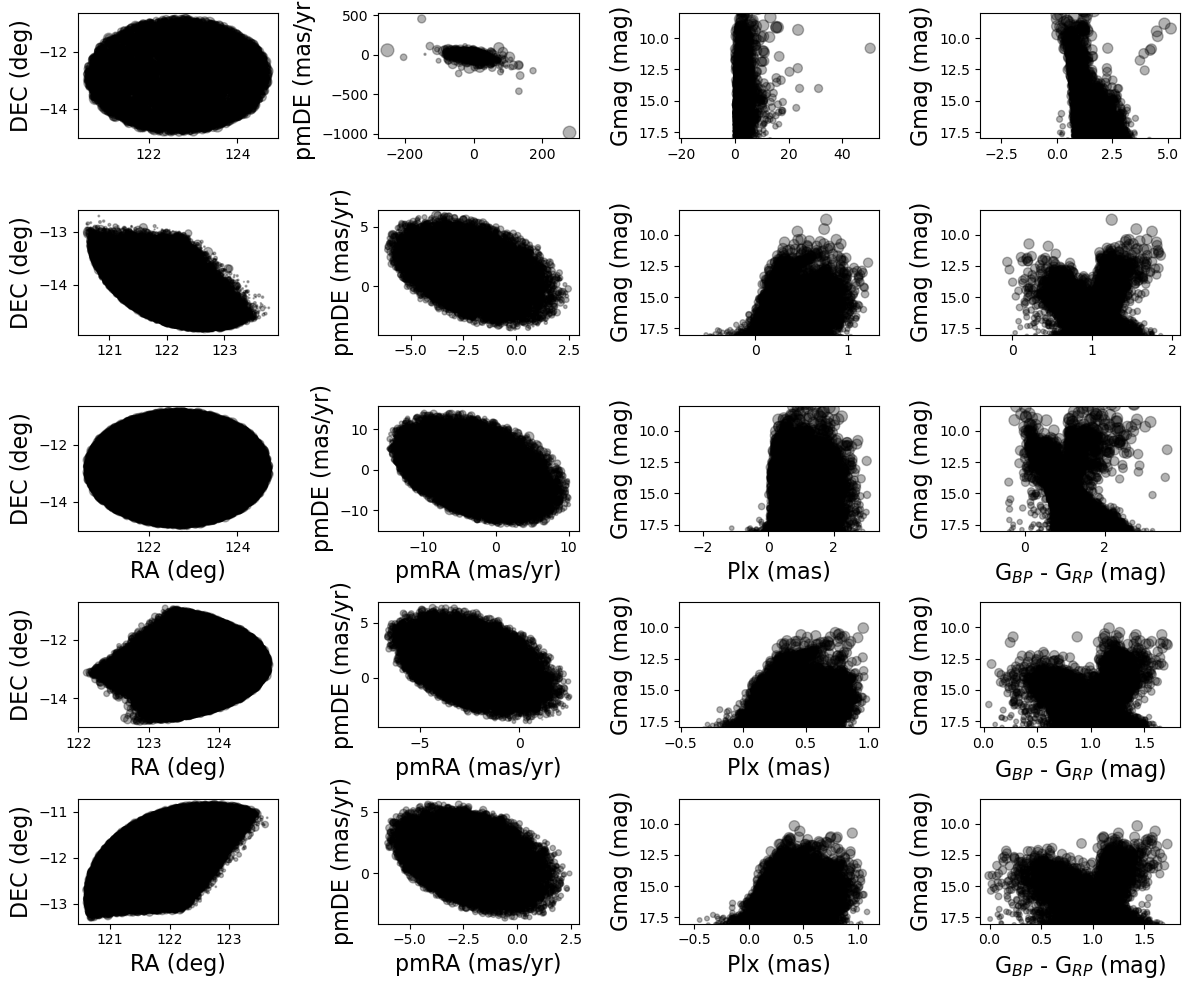

In [16]:
fig,ax = plt.subplots(5,4, figsize=(12,10),tight_layout=True)

ax[0,0].scatter(a1.RAJ2000, a1.DEJ2000, color='k', s=(19.5-a1.Gmag)*6, alpha=0.3)
ax[0,0].set_ylabel("DEC (deg)",fontsize=16)
ax[0,1].scatter(a1.pmRA, a1.pmDE, color='k', s=(19.5-a1.Gmag)*6, alpha=0.3)
ax[0,1].set_ylabel("pmDE (mas/yr)",fontsize=16)
ax[0,2].scatter(a1.Plx_corr, a1.Gmag, color='k', s=(19.5-a1.Gmag)*6, alpha=0.3)
ax[0,2].set_ylim(18,8)
ax[0,2].set_ylabel("Gmag (mag)",fontsize=16)
ax[0,3].scatter(a1["BP-RP"], a1.Gmag, color='k', s=(19.5-a1.Gmag)*6, alpha=0.3)
ax[0,3].set_ylim(18,8)
ax[0,3].set_ylabel("Gmag (mag)",fontsize=16)

ax[1,0].scatter(a2.RAJ2000, a2.DEJ2000, color='k', s=(19.5-a2.Gmag)*6, alpha=0.3)
ax[1,0].set_ylabel("DEC (deg)",fontsize=16)
ax[1,1].scatter(a2.pmRA, a2.pmDE, color='k', s=(19.5-a2.Gmag)*6, alpha=0.3)
ax[1,1].set_ylabel("pmDE (mas/yr)",fontsize=16)
ax[1,2].scatter(a2.Plx_corr, a2.Gmag, color='k', s=(19.5-a2.Gmag)*6, alpha=0.3)
ax[1,2].set_ylim(18,8)
ax[1,2].set_ylabel("Gmag (mag)",fontsize=16)
ax[1,3].scatter(a2["BP-RP"], a2.Gmag, color='k', s=(19.5-a2.Gmag)*6, alpha=0.3)
ax[1,3].set_ylim(18,8)
ax[1,3].set_ylabel("Gmag (mag)",fontsize=16)

ax[2,0].scatter(a3.RAJ2000, a3.DEJ2000, color='k', s=(19.5-a3.Gmag)*6, alpha=0.3)
ax[2,0].set_xlabel("RA (deg)",fontsize=16)
ax[2,0].set_ylabel("DEC (deg)",fontsize=16)
ax[2,1].scatter(a3.pmRA, a3.pmDE, color='k', s=(19.5-a3.Gmag)*6, alpha=0.3)
ax[2,1].set_xlabel("pmRA (mas/yr)",fontsize=16)
ax[2,1].set_ylabel("pmDE (mas/yr)",fontsize=16)
ax[2,2].scatter(a3.Plx_corr, a3.Gmag, color='k', s=(19.5-a3.Gmag)*6, alpha=0.3)
ax[2,2].set_ylim(18,8)
ax[2,2].set_xlabel("Plx (mas)",fontsize=16)
ax[2,2].set_ylabel("Gmag (mag)",fontsize=16)
ax[2,3].scatter(a3["BP-RP"], a3.Gmag, color='k', s=(19.5-a3.Gmag)*6, alpha=0.3)
ax[2,3].set_ylim(18,8)
ax[2,3].set_xlabel(r"G$_{BP}$ - G$_{RP}$ (mag)",fontsize=16)
ax[2,3].set_ylabel("Gmag (mag)",fontsize=16)

ax[3,0].scatter(a4.RAJ2000, a4.DEJ2000, color='k', s=(19.5-a4.Gmag)*6, alpha=0.3)
ax[3,0].set_xlabel("RA (deg)",fontsize=16)
ax[3,0].set_ylabel("DEC (deg)",fontsize=16)
ax[3,1].scatter(a4.pmRA, a4.pmDE, color='k', s=(19.5-a4.Gmag)*6, alpha=0.3)
ax[3,1].set_xlabel("pmRA (mas/yr)",fontsize=16)
ax[3,1].set_ylabel("pmDE (mas/yr)",fontsize=16)
ax[3,2].scatter(a4.Plx_corr, a4.Gmag, color='k', s=(19.5-a4.Gmag)*6, alpha=0.3)
ax[3,2].set_ylim(18,8)
ax[3,2].set_xlabel("Plx (mas)",fontsize=16)
ax[3,2].set_ylabel("Gmag (mag)",fontsize=16)
ax[3,3].scatter(a4["BP-RP"], a4.Gmag, color='k', s=(19.5-a4.Gmag)*6, alpha=0.3)
ax[3,3].set_ylim(18,8)
ax[3,3].set_xlabel(r"G$_{BP}$ - G$_{RP}$ (mag)",fontsize=16)
ax[3,3].set_ylabel("Gmag (mag)",fontsize=16)

ax[4,0].scatter(a5.RAJ2000, a5.DEJ2000, color='k', s=(19.5-a5.Gmag)*6, alpha=0.3)
ax[4,0].set_xlabel("RA (deg)",fontsize=16)
ax[4,0].set_ylabel("DEC (deg)",fontsize=16)
ax[4,1].scatter(a5.pmRA, a5.pmDE, color='k', s=(19.5-a5.Gmag)*6, alpha=0.3)
ax[4,1].set_xlabel("pmRA (mas/yr)",fontsize=16)
ax[4,1].set_ylabel("pmDE (mas/yr)",fontsize=16)
ax[4,2].scatter(a5.Plx_corr, a5.Gmag, color='k', s=(19.5-a5.Gmag)*6, alpha=0.3)
ax[4,2].set_ylim(18,8)
ax[4,2].set_xlabel("Plx (mas)",fontsize=16)
ax[4,2].set_ylabel("Gmag (mag)",fontsize=16)
ax[4,3].scatter(a5["BP-RP"], a5.Gmag, color='k', s=(19.5-a5.Gmag)*6, alpha=0.3)
ax[4,3].set_ylim(18,8)
ax[4,3].set_xlabel(r"G$_{BP}$ - G$_{RP}$ (mag)",fontsize=16)
ax[4,3].set_ylabel("Gmag (mag)",fontsize=16)